In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [22]:
x = np.loadtxt("c:/work/teaching/machine learning/data/hmm_pb1.csv", delimiter=',')
x = torch.tensor(x).long()-1
print(x)

tensor([0, 1, 4, 4, 0, 2, 5, 2, 1, 2, 5, 5, 0, 2, 2, 1, 2, 3, 2, 0, 1, 1, 3, 1,
        4, 5, 2, 1, 0, 4, 4, 1, 1, 4, 2, 3, 0, 5, 5, 0, 4, 4, 1, 5, 1, 0, 0, 2,
        5, 0, 3, 2, 0, 1, 1, 5, 2, 2, 0, 1, 0, 5, 3, 2, 1, 2, 0, 0, 4, 0, 1, 3,
        0, 2, 1, 5, 0, 5, 5, 0, 5, 5, 4, 3, 5, 4, 1, 2, 2, 0, 4, 5, 1, 5, 2, 5,
        5, 2, 2, 2, 5, 5, 5, 5, 4, 0, 1, 5, 5, 5, 1, 5, 5, 5, 2, 4, 1, 5, 2, 5,
        1, 5, 5, 0, 2, 0, 0, 3, 4, 5, 1, 2, 0, 2, 5, 1, 5, 5, 2, 4, 3, 4, 5, 2,
        2, 1, 5, 1, 5, 2, 2, 1, 4, 2, 5, 4, 2, 4, 1, 0, 2, 5, 1, 4, 4, 0, 5, 5,
        5, 5, 0, 4, 1, 3, 5, 0, 1, 3, 2, 0, 2, 2, 0, 1, 1, 5, 5, 5, 4, 3, 2, 2,
        2, 5, 2, 1, 1, 2, 0, 3, 4, 4, 1, 4, 3, 2, 0, 5, 0, 1, 5, 3, 1, 5, 5, 2,
        0, 1, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 3, 3, 5, 5, 1, 1, 5, 5, 2, 5, 5, 1, 4, 5, 2, 5, 3, 3, 5, 5, 5, 5, 1,
        3, 5, 1, 5, 5, 5, 5, 5, 5, 3, 2])


In [48]:
x = np.loadtxt("c:/work/teaching/machine learning/data/hmm_pb2.csv", delimiter=',')
x = torch.tensor(x).long()-1
print(x.shape)

torch.Size([10000])


In [20]:
pi=torch.tensor([0.5,0.5])
a=torch.tensor([[0.95,0.05],[0.05,0.95]])
b=torch.tensor([[1/6,1/6,1/6,1/6,1/6,1/6],[.1,.1,.1,.1,.1,0.5]])
print(pi)
print(a)
print(b)

tensor([0.5000, 0.5000])
tensor([[0.9500, 0.0500],
        [0.0500, 0.9500]])
tensor([[0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.5000]])


In [27]:
def Viterbi(x,a,b,pi):
    T = x.shape[0]
    C=torch.zeros((2,T))
    Ptr=torch.zeros((2,T))
    la=torch.log(a)
    lb=torch.log(b)
    C[:,0]=torch.log(b[:,x[0]]*pi)
    for t in range(1,T):
        li=la+C[:,t-1].view(-1,1)
        mli,amli=torch.max(li,dim=0)
        C[:,t]=lb[:,x[t]]+mli
        Ptr[:,t]=amli
    y=torch.zeros(T).long()
    y[T-1]=torch.argmax(C[:,T-1])
    for t in range(T-1,0,-1):
        y[t-1]=Ptr[y[t],t]
    return y
Viterbi(x,a,b,pi)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
def fwd(x,a,b,pi):
    T = x.shape[0]
    al=torch.zeros((2,T),device=x.device)
    al[:,0]=b[:,x[0]]*pi
    for t in range(1,T):
        li=a*al[:,t-1].view(-1,1)
        sli=b[:,x[t]]*torch.sum(li,dim=0)
        al[:,t]=sli/torch.sum(sli)
    return al
def bk(x,a,b,pi):
    T = x.shape[0]
    be=torch.ones((2,T),device=x.device)
    for t in range(T-1,0,-1):
        li=a*be[:,t].view(1,-1)*b[:,x[t]].view(1,-1)
        sli=torch.sum(li,dim=1)
        be[:,t-1]=sli/torch.sum(sli)
    return be

al=fwd(x,a,b,pi)
be=bk(x,a,b,pi)
print(al[0,135]/al[1,135], be[0,135]/be[1,135])



tensor(4.2971, device='cuda:0') tensor(0.9841, device='cuda:0')


In [52]:
pi=torch.tensor([0.5,0.5])
a=torch.rand(2,2)
b=torch.rand(2,6)
a=a/torch.sum(a,1).view(-1,1)
b=b/torch.sum(b,1).view(-1,1)
print(a)
print(b)

tensor([[0.6181, 0.3819],
        [0.7757, 0.2243]])
tensor([[0.3040, 0.1855, 0.1330, 0.0750, 0.1265, 0.1760],
        [0.0834, 0.1211, 0.1527, 0.0861, 0.2859, 0.2708]])


In [46]:
x=x.to(device)
a=a.to(device)
b=b.to(device)
pi=pi.to(device)

In [53]:
for it in range(100):
    # E step
    al=fwd(x,a,b,pi)
    be=bk(x,a,b,pi)
    bb=be*b[:,x]
    bb=bb[:,1:].unsqueeze(0)
    xi=al[:,:-1].unsqueeze(1)*a.unsqueeze(2)*bb
    xi=xi/torch.sum(xi,dim=[0,1])
    ga=al*be
    ga=ga/torch.sum(ga,dim=0)
    # M step
    pi=ga[:,0]
    a=torch.sum(xi,dim=2)#/torch.sum(ga[:,:-1],dim=1)
    a=a/torch.sum(a,dim=1).view(-1,1)
    sga=torch.sum(ga,dim=1)
    for k in range(b.shape[1]):
        b[:,k]=torch.sum(ga[:,x==k],dim=1)
    b=b/sga.view(-1,1)
    print(a)
    print(b)

tensor([[0.6312, 0.3688],
        [0.7839, 0.2161]])
tensor([[0.2543, 0.2236, 0.1760, 0.1820, 0.0866, 0.0775],
        [0.0743, 0.1561, 0.2153, 0.2238, 0.2039, 0.1267]])
tensor([[0.6318, 0.3682],
        [0.7830, 0.2170]])
tensor([[0.2542, 0.2233, 0.1759, 0.1816, 0.0874, 0.0775],
        [0.0744, 0.1567, 0.2155, 0.2247, 0.2020, 0.1267]])
tensor([[0.6324, 0.3676],
        [0.7821, 0.2179]])
tensor([[0.2542, 0.2230, 0.1759, 0.1812, 0.0883, 0.0774],
        [0.0744, 0.1573, 0.2157, 0.2256, 0.2003, 0.1267]])
tensor([[0.6329, 0.3671],
        [0.7814, 0.2186]])
tensor([[0.2541, 0.2227, 0.1758, 0.1808, 0.0891, 0.0774],
        [0.0745, 0.1579, 0.2159, 0.2265, 0.1985, 0.1268]])
tensor([[0.6334, 0.3666],
        [0.7806, 0.2194]])
tensor([[0.2541, 0.2225, 0.1757, 0.1804, 0.0899, 0.0774],
        [0.0745, 0.1584, 0.2161, 0.2273, 0.1969, 0.1268]])
tensor([[0.6338, 0.3662],
        [0.7799, 0.2201]])
tensor([[0.2541, 0.2222, 0.1756, 0.1800, 0.0907, 0.0774],
        [0.0745, 0.1590, 0.2163, 0.2281

tensor([[0.6379, 0.3621],
        [0.7731, 0.2269]])
tensor([[0.2558, 0.2155, 0.1742, 0.1692, 0.1114, 0.0740],
        [0.0706, 0.1733, 0.2193, 0.2514, 0.1512, 0.1343]])
tensor([[0.6378, 0.3622],
        [0.7732, 0.2268]])
tensor([[0.2559, 0.2154, 0.1742, 0.1690, 0.1117, 0.0739],
        [0.0704, 0.1735, 0.2193, 0.2518, 0.1506, 0.1345]])
tensor([[0.6377, 0.3623],
        [0.7733, 0.2267]])
tensor([[0.2559, 0.2153, 0.1742, 0.1688, 0.1120, 0.0738],
        [0.0703, 0.1737, 0.2193, 0.2521, 0.1500, 0.1347]])
tensor([[0.6376, 0.3624],
        [0.7735, 0.2265]])
tensor([[0.2560, 0.2152, 0.1742, 0.1686, 0.1123, 0.0737],
        [0.0701, 0.1739, 0.2192, 0.2525, 0.1494, 0.1349]])
tensor([[0.6374, 0.3626],
        [0.7736, 0.2264]])
tensor([[0.2561, 0.2151, 0.1742, 0.1685, 0.1125, 0.0736],
        [0.0700, 0.1741, 0.2192, 0.2528, 0.1488, 0.1351]])
tensor([[0.6373, 0.3627],
        [0.7738, 0.2262]])
tensor([[0.2562, 0.2150, 0.1742, 0.1683, 0.1128, 0.0735],
        [0.0698, 0.1744, 0.2192, 0.2532

tensor([[0.6297, 0.3703],
        [0.7829, 0.2171]])
tensor([[0.2602, 0.2111, 0.1754, 0.1627, 0.1217, 0.0689],
        [0.0625, 0.1828, 0.2164, 0.2644, 0.1293, 0.1445]])
tensor([[0.6295, 0.3705],
        [0.7831, 0.2169]])
tensor([[0.2603, 0.2110, 0.1755, 0.1626, 0.1218, 0.0688],
        [0.0624, 0.1830, 0.2163, 0.2646, 0.1290, 0.1447]])


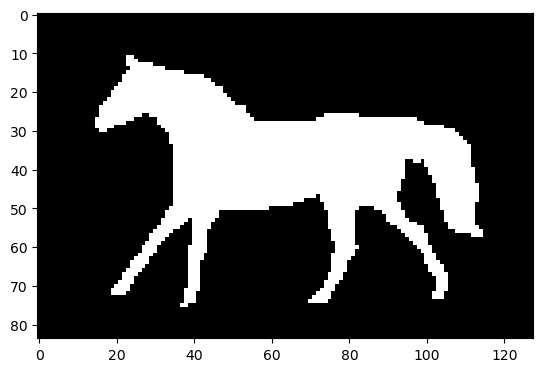

In [11]:
import imageio.v3 as iio
im = iio.imread('C:\\Work\\Teaching\\Machine Learning\\Data\horse025b.png')
im=torch.tensor(im).float()
plt.imshow(im.numpy(),cmap='gray')

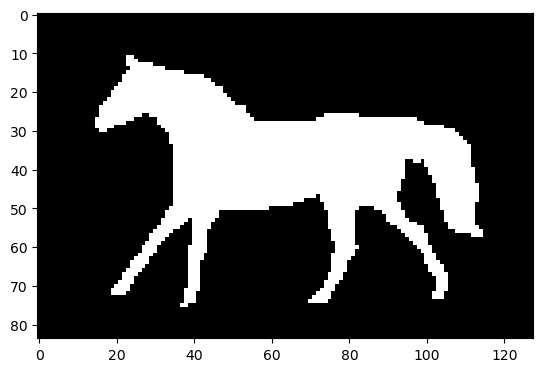

In [36]:
from torch.utils.data import TensorDataset, DataLoader
r,c=im.shape
x=torch.zeros(r*c,2).to(device)
y=torch.zeros(r*c).to(device)
for i in range(r):
    for j in range(c):
        idx=i*c+j
        #idx=j*r+i
        x[idx,0]=i
        x[idx,1]=j
        y[idx]=im[i,j]
mx=torch.mean(x,0)
sx=torch.std(x,0)
x=(x-mx)/sx
my=torch.mean(y)
y=y-my
plt.imshow(y.reshape(r,c).cpu().numpy(),cmap='gray')
dataset = TensorDataset(x,y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

[10] loss: 64.587
[20] loss: 51.890
[30] loss: 48.051
[40] loss: 42.423
[50] loss: 40.288
[60] loss: 37.681
[70] loss: 34.589
[80] loss: 32.550
[90] loss: 27.062
[100] loss: 26.214
[110] loss: 13.247
[120] loss: 13.603
[130] loss: 12.708
[140] loss: 12.511
[150] loss: 12.395
[160] loss: 12.729
[170] loss: 12.147
[180] loss: 11.941
[190] loss: 12.952
[200] loss: 12.989
[210] loss: 7.115
[220] loss: 6.735
[230] loss: 6.738
[240] loss: 6.606
[250] loss: 6.727
[260] loss: 6.471
[270] loss: 6.468
[280] loss: 6.232
[290] loss: 6.319
[300] loss: 6.114
Finished Training


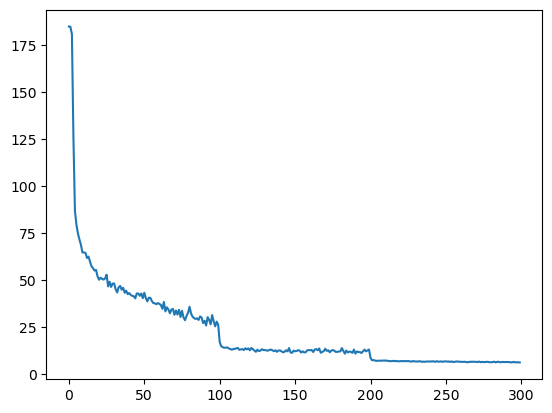

In [53]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc(x)
        return x
    
net=Net()
net=net.to(device)
n=x.shape[0]
criterion=nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[100,200], gamma=0.2)
losses=[]
for epoch in range(300):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        xi, yi = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(xi).squeeze()
        loss = criterion(outputs, yi)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    running_loss = running_loss/n
    losses.append(running_loss)
    if epoch % 10 == 9:   
        print('[%d] loss: %1.3f'%(epoch+1,running_loss))
    scheduler.step()

plt.plot(losses)
print('Finished Training')

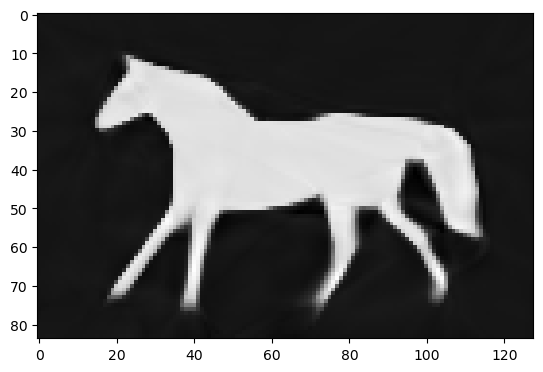

In [54]:
with torch.no_grad():
    py=net(x)
plt.imshow(py.reshape(r,c).cpu().numpy(),cmap='gray')

In [68]:
x = np.loadtxt("d:/datasets/uci/madelon/madelon_train.data")
y = np.loadtxt("d:/datasets/uci/madelon/madelon_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.data")
yt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(2000, 500) (2000,) (600, 500) (600,)


In [62]:
x = np.loadtxt("d:/datasets/uci/dexter/dexter_train.csv", delimiter=',')
y = np.loadtxt("d:/datasets/uci/dexter/dexter_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.csv", delimiter=',')
yt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(300, 20000) (300,) (300, 20000) (300,)


In [50]:
x = np.loadtxt("d:/datasets/uci/hill-valley/x.dat")
y = np.loadtxt("d:/datasets/uci/hill-valley/y.dat", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/hill-valley/xtest.dat")
yt = np.loadtxt("d:/datasets/uci/hill-valley/ytest.dat", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(606, 100) (606,) (606, 100) (606,)


In [16]:
x = np.loadtxt("d:/datasets/uci/gisette/gisette_train.data")
y = np.loadtxt("d:/datasets/uci/gisette/gisette_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.data")
yt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(6000, 5000) (6000,) (1000, 5000) (1000,)


In [69]:
sx=np.std(x,axis=0)
x=x[:,sx>0]
xt=xt[:,sx>0]
mx=np.mean(x,axis=0)
sx=np.std(x,axis=0)
print(x.shape)
x=torch.tensor((x-mx)/sx).float()
xt=torch.tensor((xt-mx)/sx).float()
y=torch.tensor(y).float()
yt=torch.tensor(yt).float()
print(torch.std(x,axis=0))

(2000, 500)
tensor([1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.00

In [70]:
n=x.shape[0]
nt=xt.shape[0]
y1=y.clone()
yt1=yt.clone()

In [71]:
y[y<0]=0
yt[yt<0]=0

In [72]:
x,y,y1=x.to(device),y.to(device),y1.to(device)
xt,yt,yt1=xt.to(device),yt.to(device),yt1.to(device)